In [67]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [68]:
fi = "indata/trajkovic.inp"
fc = "indata/trajkovic.config"
fc2 = "indata/trajkovic2.config"

mtype = 1
n1 = PyNetwork(fi,fc,mtype)

M = n1.M
N = n1.Ns[0]
L = n1.Ls[0]
a = n1.a[0]
T1 =n1.T
D = n1.Ds[0]
p1 = PyPipe_ps(N, D, L, M, a)
dt = T1/M
print n1.a
e0 = D*D*np.pi/4.-p1.AofH(0.015, False)
e0 = [0.008, 0.015, 0.028]
print e0[0]/p1.AofH(D,True)
Af =D**2/4.*np.pi
print (9.8*Af)/(9.0**2)
print sqrt(9.8*Af/.011)

[8.77]
1.01859152747
0.000950234814975
2.64521901504


In [69]:
n1.runForwardProblem(dt)

In [121]:
q = n1.q(0)
h = n1.getHofA(0)
qhist = n1.qhist(0)
#b0= e0*2.*np.arctan(np.linspace(0,100,M+1))/np.pi
print n1.Ds[0]**2*np.pi/4.
n5 = 76*2  #assuming 10 m pipe
n7 = 96*2
#assuming 8.1 m stretch of pipe
n5 = int(5.7/8.1*200)
n7 = int(7.6/8.1*200)
dx = n1.Ls[0]/n1.Ns[0]
print n7
#n7 = 187
P52 = []
P72 = []
print .5/8.1*.027

0.00785398163397
187
0.00166666666667


In [122]:
def idx_t(i,j,n):
    return (2*(N+2)*n+(N+2)*i+j)

In [123]:
for i in range(1):
    n2 = PyNetwork(fi, fc2, mtype)
    M2 = n2.M
    b0= e0[i]*np.ones(M+1)
    n2.setbVal(1,b0);
    n2.setIC(0,q[0:N],q[N:])
    n2.runForwardProblem(dt)
    qhist2 = n2.qhist(0)
    P52.append([p1.HofA(qhist2[idx_t(0,n5,n)], False) for n in range(M2+1)])
    P72.append([p1.HofA(qhist2[idx_t(0,n7,n)], False) for n in range(M2+1)])

A =0.00066833 h =0.01400000
3636808
200
0.722081851374


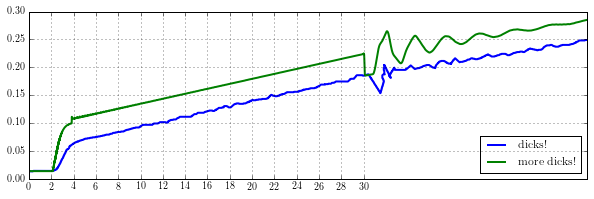

In [126]:
print "A =%.8f h =%.8f"%(p1.AofH(0.014,False),.014)
M2 = n2.M
T2 = n2.T
T1 = n1.T
t1 = linspace(0,T1, M+1)
t2 = linspace(T1,T1+T2,M2+1)
t = np.concatenate((t1,t2))

print size(qhist)
print n1.Ns[0]
print n1.cmax[0]*dt*N/L
P51 = [p1.HofA(qhist[idx_t(0,n5,n)], True) for n in range(M+1)]
P71 = [p1.HofA(qhist[idx_t(0,n7,n)], True) for n in range(M+1)]

import csv
t1 =[]
q1 = []
c1 = csv.reader(open("../../Desktop/trajkovicp7e0_0.008.txt",'rb'))
for line in c1:
    t1.append(float(line[0]))
    q1.append(float(line[1]))
pnew = np.array(P71+P72[0])
slope = np.ones(len(pnew))*float(n1.Ns[0]-n7)/n1.Ns[0]*.027
corr= zeros(len(pnew))
for i in range(len(pnew)):
    if pnew[i]>.0145:
        corr[i] = 0.
fig, ax = plt.subplots(figsize=(10,3))
ax.set_xlim(0,50)
ax.set_ylim(0,.3)
ax.set_xticks(np.linspace(0,30,16))
ax.plot(t1,q1,t,pnew-corr,lw=2)
ax.grid(True)
legend(["dicks!" ,'more dicks!'], loc = 'lower right')

IndexError: list index out of range

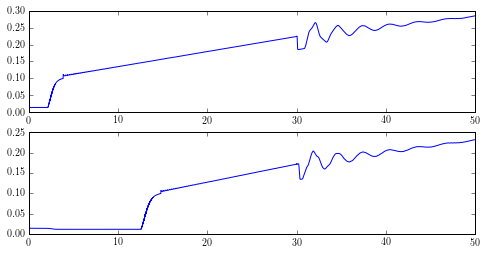

In [125]:
rc('text', usetex=True)        #for tex rendering. 
rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 
                                'monospace': ['Computer Modern Typewriter'], 'size'   : 10})
rc('font', family='serif')     #for pretty font 
#fig, ax = plt.subplots(figsize=(7,4))


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(211)
#title ('Experiments of Trajkovic (1999)')
ax2 = fig.add_subplot(212)
legs = []
for i in range(3):
    ax1.plot(t,P71+P72[i])
    ax2.plot(t,P51+P52[i])
    legs.append(r'$e_0=%1.3f$'%e0[i])
ax2.legend(legs, loc='upper left')
ax1.set_ylabel('h (m) at P7')
ax2.set_ylabel('h (m) at P5')
ax2.set_xlabel('t(s)')
ax1.set_ylim(0,.28)
ax2.set_ylim(0,.28)
ax1.plot(t,.1*np.ones(size(t)), 'k:')
ax2.plot(t,.1*np.ones(size(t)), 'k:')
savefig("../trajkovic2.eps", format='eps')

In [8]:
print shape(p)
s = shape(p)
p2 = p.astype(int)

NameError: name 'p' is not defined

In [ ]:

cf = imshow(p2, aspect='auto', origin = 'lower')
cf.set_cmap(plt.cm.bone)
xlabel('x')
ylabel('t')
ty = [".1f"%(n1.T*float(i)/n1.M) for i in range(0,5)]
print ty
#plt.gca().set_xticklabels(tx)
plt.gca().set_yticklabels(ty)

cb = colorbar(cf, ticks = [0,1], orientation = 'horizontal')
cb.ax.set_xticklabels(['False', 'True'])

In [ ]:
print len(find(p2>0))
print len(p2)

In [ ]:
p2[0]

In [ ]:
cf = imshow(p3, aspect='auto', origin='lower')
cf.set_cmap(plt.cm.bone)
cb = colorbar(cf, ticks = [0,1], orientation = 'horizontal')
cb.ax.set_xticklabels(['False', 'True'])

In [26]:
PyNetwork?


In [95]:
PyPipe_ps?
